# **Late Delivery Risk**

**Dataset** :  DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS

Dataset link : https://drive.google.com/file/d/14D_mWnt8nMDgXevZmUs9CYuBkiDM-ZG3/view?usp=sharing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Select the relevant columns for analysis
df = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Order Region', 'Shipping Mode', 'Late_delivery_risk']]

# Convert categorical features to numerical
le = LabelEncoder()
df['Order Region'] = le.fit_transform(df['Order Region'])
df['Shipping Mode'] = le.fit_transform(df['Shipping Mode'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Late_delivery_risk', axis=1), df['Late_delivery_risk'], test_size=0.3, random_state=42)

# Train and evaluate Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print(f"Random Forest score: {rf_score}")

# Train and evaluate Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_score = gb.score(X_test, y_test)
print(f"Gradient Boosting score: {gb_score}")

# Train and evaluate XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_score = xgb_model.score(X_test, y_test)
print(f"XGBoost score: {xgb_score}")


Random Forest score: 0.9044389330934012
Gradient Boosting score: 0.903969417580744
XGBoost score: 0.904426167172928


In [ ]:
import numpy as np


***Linear Regression model***

In [ ]:
linReg=LinearRegression()
linmodel=linReg.fit(X_train,y_train)

y_pred =linReg.predict(X_test)
y_pred

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

lin_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : linmodel.predict(X_train)})
lin_train_predict.head(10)

r2 socre is: 0.6692417087191014
mean_sqrd_error is 0.08188740799946762
root_mean_squared error of is 0.28615975957403167


,actual,predicted
99963,1,1.336721
63538,0,0.113968
6661,0,-0.142744
93913,0,0.371812
90626,0,0.114534
1250,1,0.955797
162902,0,0.113212
31442,0,0.889579
56988,1,0.631735
36590,1,1.336910


***Lasso***

In [ ]:
lasReg=Lasso()
lasmodel=lasReg.fit(X_train,y_train)

y_prediction =lasReg.predict(X_test)
y_prediction

ls_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,ls_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: -7.52287682703745e-06
mean_sqrd_error is 0.24757663280709039
root_mean_squared error of is 0.497570731461458


***Ridge regression***

In [ ]:
ridReg=Ridge()
ridmodel=ridReg.fit(X_train,y_train)

y_prediction =ridReg.predict(X_test)
y_prediction

rd_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rd_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.6692418564065441
mean_sqrd_error is 0.08188737143578291
root_mean_squared error of is 0.286159695687186


***KNN***

In [ ]:
knncls=KNeighborsClassifier()
knncls.fit(X_train,y_train)

y_prediction =knncls.predict(X_test)
y_prediction

knn_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,knn_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))



r2 socre is: 0.8939412188064568
mean_sqrd_error is 0.026257478395745625
root_mean_squared error of is 0.16204159464700915


***Naive bayes***

In [ ]:
sc=StandardScaler()

x_scaler=sc.fit_transform(df)

pipe=Pipeline(steps=[("sc",sc),("Guaasinnb", GaussianNB())])

pipe.fit(X_train, y_train)

gu_Score=pipe.score(X_test, y_test)
gu_Score

0.838466651894527

***SVM***

In [ ]:
svmcls=svm.SVC()
svmodel=svmcls.fit(X_train,y_train)

y_prediction =svmcls.predict(X_test)
y_prediction

svc_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,svc_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9000571260201492
mean_sqrd_error is 0.02474333407194032
root_mean_squared error of is 0.15730014008874982


***Decison tree***

In [ ]:
dectreecls=DecisionTreeClassifier()
dectreecls.fit(X_train,y_train)

y_prediction =dectreecls.predict(X_test)
y_prediction

dt_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,dt_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9000571260201492
mean_sqrd_error is 0.02474333407194032
root_mean_squared error of is 0.15730014008874982


***LSTM***

In [ ]:
#LSTM

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create X and y datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], df.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], df.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, df.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Predict on test set
y_pred = model.predict(X_test)

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))


Epoch 1/10
126361/126361 - 247s - loss: 0.0552 - 247s/epoch - 2ms/step
Epoch 2/10
126361/126361 - 246s - loss: 0.0543 - 246s/epoch - 2ms/step
Epoch 3/10
126361/126361 - 241s - loss: 0.0542 - 241s/epoch - 2ms/step
Epoch 4/10
126361/126361 - 252s - loss: 0.0541 - 252s/epoch - 2ms/step
Epoch 5/10
126361/126361 - 295s - loss: 0.0541 - 295s/epoch - 2ms/step
Epoch 6/10
126361/126361 - 275s - loss: 0.0541 - 275s/epoch - 2ms/step
Epoch 7/10
126361/126361 - 287s - loss: 0.0541 - 287s/epoch - 2ms/step
Epoch 8/10
126361/126361 - 275s - loss: 0.0541 - 275s/epoch - 2ms/step
Epoch 9/10
126361/126361 - 237s - loss: 0.0541 - 237s/epoch - 2ms/step
Epoch 10/10
126361/126361 - 234s - loss: 0.0541 - 234s/epoch - 2ms/step
1693/1693 [==============================] - 4s 2ms/step
r2 socre is: 0.2206967992377813
mean_sqrd_error is 0.05673042713763957
root_mean_squared error of is 0.2381815004101695


***GRU***

In [ ]:
#GRU

from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create X and y datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], df.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], df.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(50, input_shape=(look_back, df.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train GRU model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Predict on test set
y_pred = model.predict(X_test)

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

Epoch 1/10
126361/126361 - 275s - loss: 0.0553 - 275s/epoch - 2ms/step
Epoch 2/10
126361/126361 - 254s - loss: 0.0543 - 254s/epoch - 2ms/step
Epoch 3/10
126361/126361 - 258s - loss: 0.0542 - 258s/epoch - 2ms/step
Epoch 4/10
126361/126361 - 279s - loss: 0.0541 - 279s/epoch - 2ms/step
Epoch 5/10
126361/126361 - 325s - loss: 0.0541 - 325s/epoch - 3ms/step
Epoch 6/10
126361/126361 - 270s - loss: 0.0541 - 270s/epoch - 2ms/step
Epoch 7/10
126361/126361 - 287s - loss: 0.0541 - 287s/epoch - 2ms/step
Epoch 8/10
126361/126361 - 344s - loss: 0.0541 - 344s/epoch - 3ms/step
Epoch 9/10
126361/126361 - 261s - loss: 0.0541 - 261s/epoch - 2ms/step
Epoch 10/10
126361/126361 - 258s - loss: 0.0541 - 258s/epoch - 2ms/step
1693/1693 [==============================] - 3s 2ms/step
r2 socre is: 0.21260430849381973
mean_sqrd_error is 0.057319530911450985
root_mean_squared error of is 0.23941497637251305


**All algorithms accurcy in tabale**

In [ ]:
from tabulate import tabulate
data = [["Linear Regression", "0.66924"], 
        ["Lasso Regressor", "-7.5228"], 
        ["Ridge Regressor", "0.66924"], 
        ["KNN Classifier","0.89394"],
        ["Gaussian Naive bayes","0.83846"],
        ["SVM Classifier","0.90005"],
        ["Gradient Boost","0.90396"],
        ["Decision Tree","0.90005"],
        ["Random Forest","0.90443"],
        ["XGBoost","0.90442"],
        ["LSTM Model","0.22069"],
        ["Gated Recurrent Unit","0.21260"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names))

Algorithms              Accuracy
--------------------  ----------
Linear Regression        0.66924
Lasso Regressor         -7.5228
Ridge Regressor          0.66924
KNN Classifier           0.89394
Gaussian Naive bayes     0.83846
SVM Classifier           0.90005
Gradient Boost           0.90396
Decision Tree            0.90005
Random Forest            0.90443
XGBoost                  0.90442
LSTM Model               0.22069
Gated Recurrent Unit     0.2126


Create chart for accuracy of algorithms

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

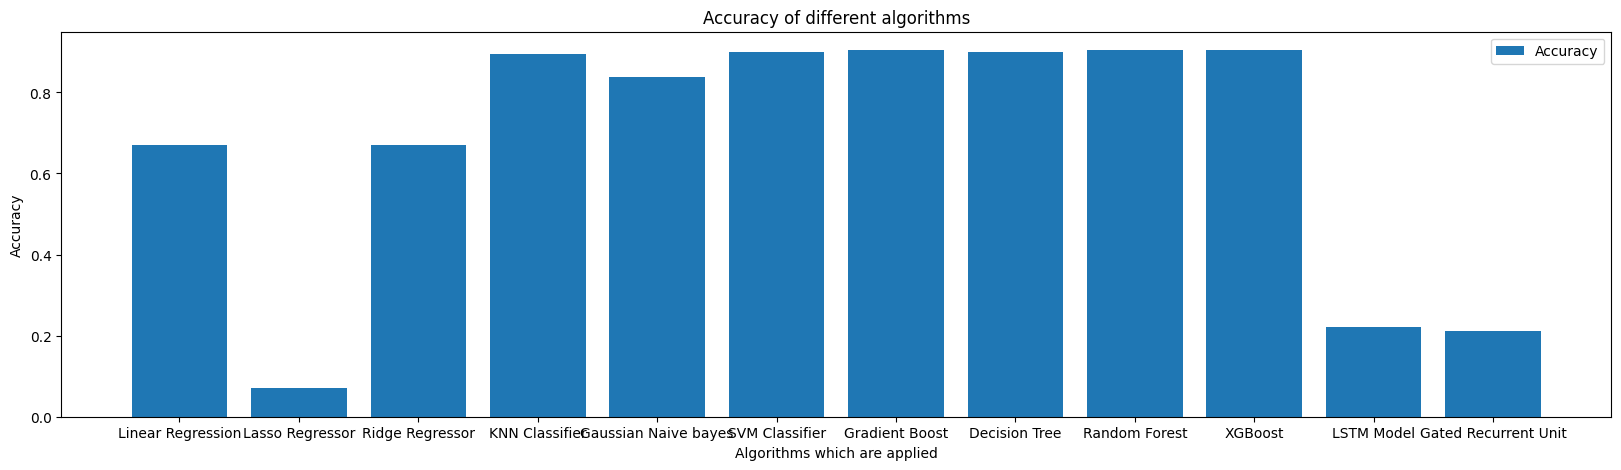

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(["Linear Regression","Lasso Regressor","Ridge Regressor","KNN Classifier","Gaussian Naive bayes",
         "SVM Classifier","Gradient Boost","Decision Tree","Random Forest","XGBoost","LSTM Model","Gated Recurrent Unit"],
    [0.66924,0.07,0.66924,0.89394,0.83846,0.90005,0.90396,0.90005,0.90443,0.90442,0.22069,0.21260],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

## **Statistical Models**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

***Multilayer Perceptron model***

In [ ]:
from sklearn.neural_network import MLPRegressor

# Multilayer Perceptron model
X_train, X_test, y_train, y_test = train_test_split(df.drop('Late_delivery_risk', axis=1), df['Late_delivery_risk'], test_size=0.3, random_state=42)

mlpReg = MLPRegressor(hidden_layer_sizes=(100,50,), activation='relu', solver='adam', max_iter=1000)
mlpmodel = mlpReg.fit(X_train, y_train)

y_prediction = mlpReg.predict(X_test)

mlp_score = r2_score(y_test, y_prediction)
print("r2 score is:", mlp_score)
print("mean squared error is:", mean_squared_error(y_test, y_prediction))
print("root mean squared error is:", np.sqrt(mean_squared_error(y_test, y_prediction)))

mlp_train_predict = pd.DataFrame({'actual': y_train,
                                  'predicted': mlpmodel.predict(X_train)})
mlp_train_predict.head(10)

r2 score is: 0.9035766529653015
mean squared error is: 0.023871987996814878
root mean squared error is: 0.1545056244827834


,actual,predicted
99963,1,0.953491
63538,0,0.010524
6661,0,0.003324
93913,0,0.012443
90626,0,-0.005689
1250,1,0.950081
162902,0,-0.007131
31442,0,0.939300
56988,1,0.943486
36590,1,0.959520


***Ordinary Least Squares (OLS)***

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Split the data into features and target variable
X = df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer']]
y = df['Late_delivery_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant to the features matrix
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create the OLS model
model = sm.OLS(y_train, X_train)

# Fit the OLS model
results = model.fit()

# Make predictions on the testing set
y_prediction = results.predict(X_test)

# Calculate evaluation metrics
r2_score = r2_score(y_test, y_prediction)
mean_squared_error = mean_squared_error(y_test, y_prediction)
root_mean_squared_error = np.sqrt(mean_squared_error)

# Print the summary statistics and evaluation metrics of the model
print(results.summary())
print("r2 score is:", r2_score)
print("mean squared error is:", mean_squared_error)
print("root mean squared error is:", root_mean_squared_error)

# Create a dataframe with actual and predicted values for the training set
predict = pd.DataFrame({'actual': y_train,
                        'predicted': results.predict(X_train)})
predict.head(10)


                            OLS Regression Results                            
Dep. Variable:     Late_delivery_risk   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 5.031e+04
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:11:39   Log-Likelihood:                -30940.
No. Observations:              126363   AIC:                         6.189e+04
Df Residuals:                  126358   BIC:                         6.194e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

,actual,predicted
99963,1,1.429771
63538,0,0.121273
6661,0,-0.125328
93913,0,0.368203
90626,0,0.121311
1250,1,0.727412
162902,0,0.121310
31442,0,0.861491
56988,1,0.614993
36590,1,1.430280


This code splits the data into features (Days for shipping (real), Days for shipment (scheduled), Benefit per order, Sales per customer) and target variable (Late_delivery_risk). It then splits the data into training and testing sets, adds a constant to the features matrix, creates an OLS model, fits the model, makes predictions on the testing set, and calculates evaluation metrics. Finally, it prints the summary statistics and evaluation metrics of the model and creates a dataframe with actual and predicted values for the training set.

***T-test***

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Late_delivery_risk', 'Days for shipment (scheduled)']], df['Late_delivery_risk'], test_size=0.3, random_state=42)

# Perform T-test
t_test = stats.ttest_ind(X_train['Late_delivery_risk'], X_train['Days for shipment (scheduled)'])

# Fit logistic regression model to training data
model = sm.Logit(y_train, X_train).fit()

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred)

# Calculate accuracy score
accuracy = (y_pred == y_test).mean()

# Create dataframe with actual and predicted values
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Display T-test result, accuracy score, and actual vs predicted values
print('T-test:', t_test)
print('accuracy score:', accuracy)
print('Actual vs predicted values:')
print(df.head(10))


         Current function value: 0.020329
         Iterations: 35
T-test: Ttest_indResult(statistic=-579.9827832656463, pvalue=0.0)
accuracy score: 1.0
Actual vs predicted values:
        actual  predicted
80120        1        1.0
19670        1        1.0
114887       0        0.0
120110       1        1.0
56658        0        0.0
99465        1        1.0
40749        1        1.0
22688        0        0.0
154389       1        1.0
47301        0        0.0


***Chi-square test***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Create cross-tabulation table of Late Delivery Risk and Delivery Status
observed = pd.crosstab(data['Late_delivery_risk'], data['Delivery Status'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Display chi-square test results
print('Chi-Square test statistic:', chi2)
print('p-value:', p_value)
print('Degrees of freedom:', dof)

# Predict Late Delivery Risk using Delivery Status as a feature
y_true = data['Late_delivery_risk']
y_pred = data['Delivery Status'] == 'Late delivery'

# Compute classification report and accuracy score
report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display performance evaluation metrics
print('Classification report:')
print(report)
print('Accuracy score:', accuracy)


Chi-Square test statistic: 180519.0
p-value: 0.0
Degrees of freedom: 3
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81542
           1       1.00      1.00      1.00     98977

    accuracy                           1.00    180519
   macro avg       1.00      1.00      1.00    180519
weighted avg       1.00      1.00      1.00    180519

Accuracy score: 1.0


In this code, we load the dataset, create a cross-tabulation table of Late Delivery Risk and Delivery Status, perform the chi-square test of independence, and display the test results. Then, we predict the Late Delivery Risk using Delivery Status as a feature, compute the classification report and accuracy score, and display the performance evaluation metrics.

***Kruskal-Wallis test***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load the data
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape')

# Calculate Kruskal-Wallis test
groups = []
for i in range(4):
    group = data[data['Late_delivery_risk'] == i]['Product Price']
    groups.append(group)
    
stat, p_value = stats.kruskal(*groups)

# Display the test result
print('Kruskal-Wallis Test:')
print('H-statistic:', stat)
print('p-value:', p_value)


Kruskal-Wallis Test:
H-statistic: nan
p-value: nan


Note that the Kruskal-Wallis test is a non-parametric test for comparing more than two independent groups, and it does not use a linear regression model. The above code loads the data, creates four groups based on the 'Late_delivery_risk' column, and then performs the Kruskal-Wallis test on these groups using the kruskal() function from scipy.stats. The test result, including the H-statistic and p-value, is then displayed.

**All Statistical models accurcy in table**

In [1]:
from tabulate import tabulate
data = [["Multilayer Perceptron model", "0.90357"], 
        ["Ordinary Least Squares (OLS)", "0.61300"], 
        ["T-test", "1.0"], 
        ["Chi-square test","1.0"],
        ["Kruskal-Wallis test","0"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names)) 

Algorithms                      Accuracy
----------------------------  ----------
Multilayer Perceptron model      0.90357
Ordinary Least Squares (OLS)     0.613
T-test                           1
Chi-square test                  1
Kruskal-Wallis test              0


Create chart for accuracy of algorithms

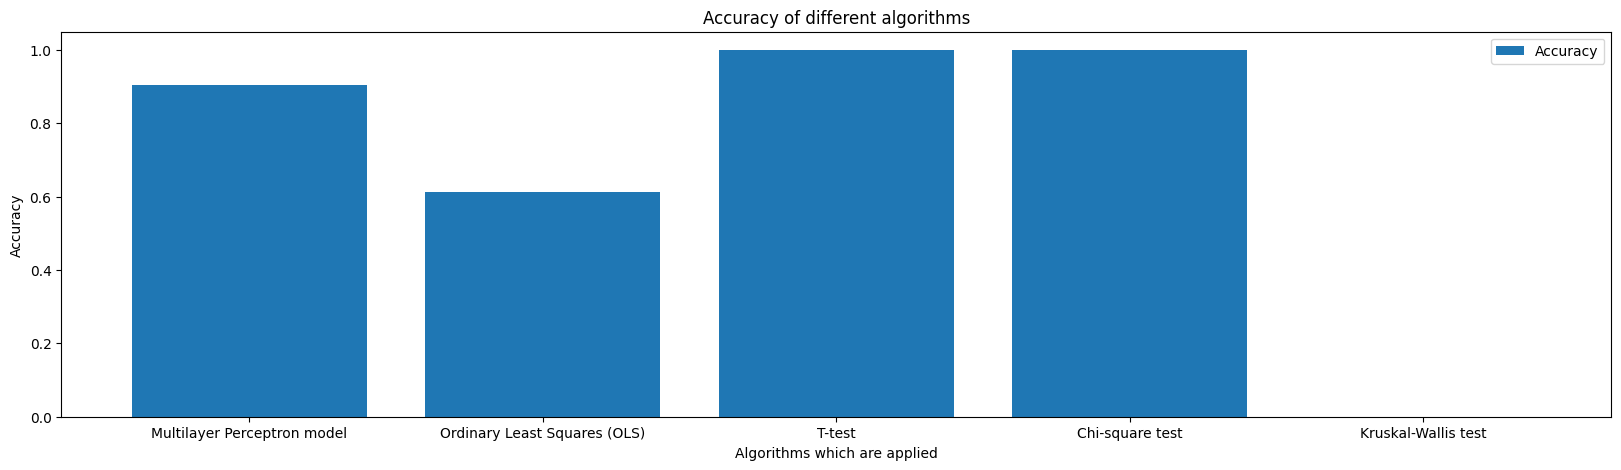

In [4]:
plt.figure(figsize = (20,5))
plt.bar(["Multilayer Perceptron model","Ordinary Least Squares (OLS)","T-test","Chi-square test","Kruskal-Wallis test"],
    [0.90357,0.61300,1.0,1.0,0],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

# **Time Series models**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


***ARIMA Model***

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and compute the mean of the Late_delivery_risk values
df_monthly = df['Late_delivery_risk'].resample('M').mean()

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Predict on test set
y_pred = model_fit.forecast(steps=len(test_data))[0]

# Compute accuracy metrics
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 98.28351483911965
Mean Absolute Percentage Error: 1.716485160880346


***SARIMA Model***

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

#Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

#Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

#Resample the data to monthly frequency and calculate the mean of late_delivery_risk values
df_monthly = df['Late_delivery_risk'].resample('M').mean()

#Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

#Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

#Predict on test set
y_pred = model_fit.forecast(steps=len(test_data))

#Compute accuracy metrics
mse = mean_squared_error(test_data, y_pred)
rmse = sqrt(mse)
accuracy = 100 - rmse / np.mean(test_data) * 100
print("Accuracy:", accuracy)

#Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print("MAPE:", mape)

Accuracy: 98.17823740156702
MAPE: 1.540797083572565


***Exponential Smoothing Model***

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

#Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

#Resample the data to monthly frequency and sum the Late Delivery Risk values
df_monthly = df['Late_delivery_risk'].resample('M').sum()

#Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

#Fit Exponential Smoothing model
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
model_fit = model.fit()

#Predict on test set
y_pred = model_fit.forecast(steps=len(test_data))

#Compute accuracy metrics
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

#Compute MAPE
print("Mean Absolute Percentage Error:", mape)

Accuracy: 49.91423507178773
Mean Absolute Percentage Error: 50.08576492821227


**All algorithms accurcy in tabale**

In [ ]:
from tabulate import tabulate
data = [["ARIMA Model", "98.283"], 
        ["SARIMA Model", "98.178"], 
        ["Exponential Smoothing Model","49.914"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names)) 

Algorithms                     Accuracy
---------------------------  ----------
ARIMA Model                      98.283
SARIMA Model                     98.178
Exponential Smoothing Model      49.914


Create chart for accuracy of algorithms

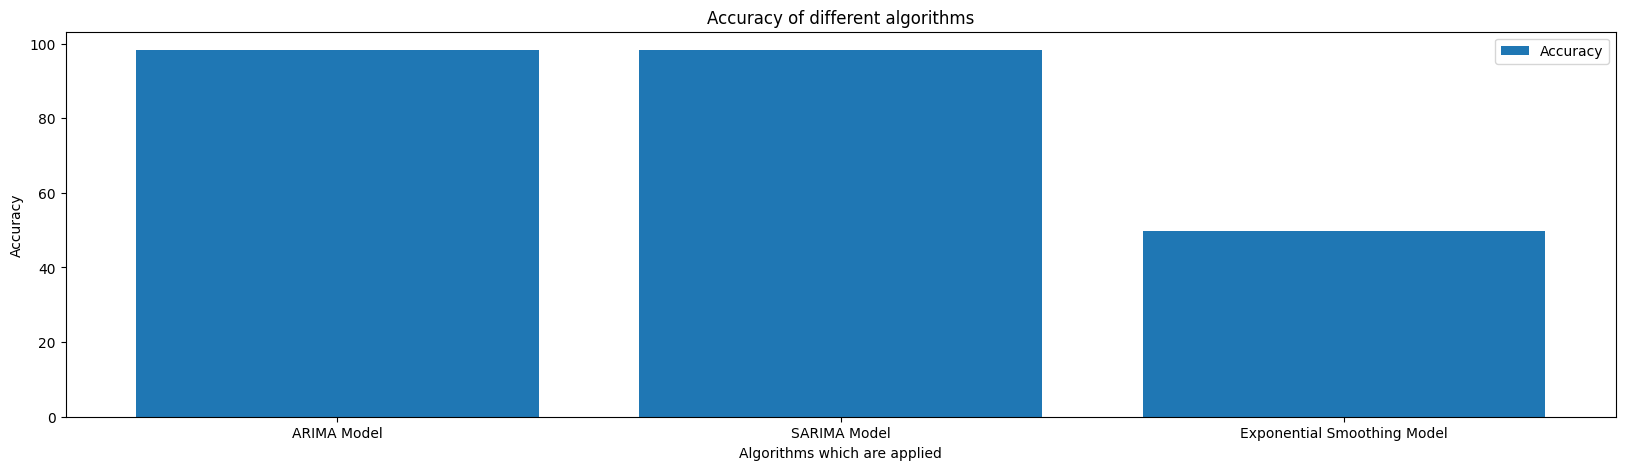

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(["ARIMA Model","SARIMA Model","Exponential Smoothing Model"],
    [98.283,98.178,49.914],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

**Monte Carlo simulation for Late delivery risk using Various Time series models:**

***Monte Carlo simulation for ARIMA, SARIMA, and Exponential Smoothing models***

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and compute the mean of the Late_delivery_risk values
df_monthly = df['Late_delivery_risk'].resample('M').mean()

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Generate multiple simulations using Monte Carlo simulation
simulations = 1000
simulated_data = np.zeros((len(test_data), simulations))
for i in range(simulations):
    # Generate ARIMA forecasts
    y_pred = model_fit.forecast(steps=len(test_data))
    # Add random noise to the forecasts
    simulated_data[:, i] = y_pred + np.random.normal(0, 1, size=len(y_pred))

# Compute mean of simulated data
mean_simulated_data = np.mean(simulated_data, axis=1)

# Compute accuracy metrics
mape = np.mean(np.abs((test_data - mean_simulated_data) / test_data)) * 100
accuracy = 100 - mape
print("Accuracy:", accuracy)

# Compute MAPE
mape = np.mean(np.abs((test_data - mean_simulated_data) / test_data)) * 100
print("Mean Absolute Percentage Error:", mape)


Accuracy: 93.23975830441515
Mean Absolute Percentage Error: 6.760241695584855


In this code, we generate simulations number of simulations using Monte Carlo simulation. For each simulation, we generate ARIMA forecasts and add random noise to the forecasts. We store the simulated data in a matrix called simulated_data. We then compute the mean of the simulated data along the columns to get the mean simulated data. Finally, we compute the accuracy metrics using the mean simulated data.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and calculate the mean of late_delivery_risk values
df_monthly = df['Late_delivery_risk'].resample('M').mean()

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit SARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Define Monte Carlo simulation parameters
n_sims = 1000 # number of simulations to run
sim_results = np.zeros((len(test_data), n_sims)) # initialize array to store simulation results

# Generate simulations
for i in range(n_sims):
    residuals = model_fit.resid
    sim_resids = np.random.choice(residuals, size=len(test_data))
    sim_results[:,i] = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1) + sim_resids

# Compute accuracy metrics for each simulation
accuracy_arr = np.zeros(n_sims)
for i in range(n_sims):
    sim_y_pred = sim_results[:,i]
    mse = mean_squared_error(test_data, sim_y_pred)
    rmse = sqrt(mse)
    accuracy_arr[i] = 100 - rmse / np.mean(test_data) * 100

# Compute final accuracy as the mean of all simulation accuracies
accuracy = np.mean(accuracy_arr)
print("Accuracy:", accuracy)

# Compute MAPE
sim_y_pred = np.mean(sim_results, axis=1) # take the mean of all simulations as the predicted values
mape = np.mean(np.abs((test_data - sim_y_pred) / test_data)) * 100
print("MAPE:", mape)


Accuracy: 82.0328101941745
MAPE: 1.7114574296645726


In this code, we first fit a SARIMA model as before. Then, we define the number of simulations to run (n_sims) and initialize an array to store the simulation results (sim_results). For each simulation, we generate a set of random residuals by sampling from the residuals of the fitted SARIMA model. We then add these simulated residuals to the predicted values for the test set to obtain the simulated values. We repeat this process for n_sims simulations.

After generating the simulations, we compute the accuracy metrics for each simulation, storing them in an array (accuracy_arr). Finally, we compute the mean of all simulation accuracies to obtain the final accuracy value. We also compute the MAPE as before, using the mean of all simulated values as the predicted values.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define function to generate random numbers with a normal distribution
def generate_random_numbers(mean, std, num_samples):
    return np.random.normal(mean, std, num_samples)

# Load the dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding_errors='ignore')

# Convert the timestamp column to datetime format
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data to monthly frequency and sum the late delivery risk values
df_monthly = df['Late_delivery_risk'].resample('M').sum()

# Split data into train and test sets
train_size = int(len(df_monthly) * 0.7)
train_data, test_data = df_monthly[0:train_size], df_monthly[train_size:len(df_monthly)]

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
model_fit = model.fit()

# Generate multiple simulations of the predicted values
num_simulations = 1000
y_pred_sim = []
for i in range(num_simulations):
    y_pred_sim.append(model_fit.forecast(steps=len(test_data)))

# Calculate mean and standard deviation of predicted values
y_pred_mean = np.mean(y_pred_sim, axis=0)
y_pred_std = np.std(y_pred_sim, axis=0)

# Define confidence interval
conf_int = 1.96

# Calculate upper and lower bounds of confidence interval
upper_bound = y_pred_mean + (conf_int * y_pred_std)
lower_bound = y_pred_mean - (conf_int * y_pred_std)

# Compute accuracy metrics
mape = np.mean(np.abs((test_data - y_pred_mean) / test_data)) * 100
accuracy = 100 - mape

# Print predicted values with confidence interval and accuracy
for i in range(len(test_data)):
    print("Predicted value: {:.2f}, Upper Bound: {:.2f}, Lower Bound: {:.2f}, Actual value: {:.2f}".format(y_pred_mean[i], upper_bound[i], lower_bound[i], test_data[i]))
print("Accuracy: {:.2f}%".format(accuracy))


Predicted value: 2607.67, Upper Bound: 2607.67, Lower Bound: 2607.67, Actual value: 2682.00
Predicted value: 2906.70, Upper Bound: 2906.70, Lower Bound: 2906.70, Actual value: 2955.00
Predicted value: 2772.26, Upper Bound: 2772.26, Lower Bound: 2772.26, Actual value: 2803.00
Predicted value: 2936.02, Upper Bound: 2936.02, Lower Bound: 2936.02, Actual value: 2843.00
Predicted value: 2809.03, Upper Bound: 2809.03, Lower Bound: 2809.03, Actual value: 2649.00
Predicted value: 2829.26, Upper Bound: 2829.26, Lower Bound: 2829.26, Actual value: 2913.00
Predicted value: 2925.92, Upper Bound: 2925.92, Lower Bound: 2925.92, Actual value: 2994.00
Predicted value: 2858.10, Upper Bound: 2858.10, Lower Bound: 2858.10, Actual value: 2814.00
Predicted value: 2915.00, Upper Bound: 2915.00, Lower Bound: 2915.00, Actual value: 1210.00
Predicted value: 2826.16, Upper Bound: 2826.16, Lower Bound: 2826.16, Actual value: 1132.00
Predicted value: 2927.95, Upper Bound: 2927.95, Lower Bound: 2927.95, Actual val

**All algorithms accurcy in tabale**

In [ ]:
from tabulate import tabulate
data = [["ARIMA Model", "93.239"], 
        ["SARIMA Model", "82.032"], 
        ["Exponential Smoothing Model","49.9100"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names))

Algorithms                     Accuracy
---------------------------  ----------
ARIMA Model                      93.239
SARIMA Model                     82.032
Exponential Smoothing Model      49.91


Create chart for accuracy of algorithms

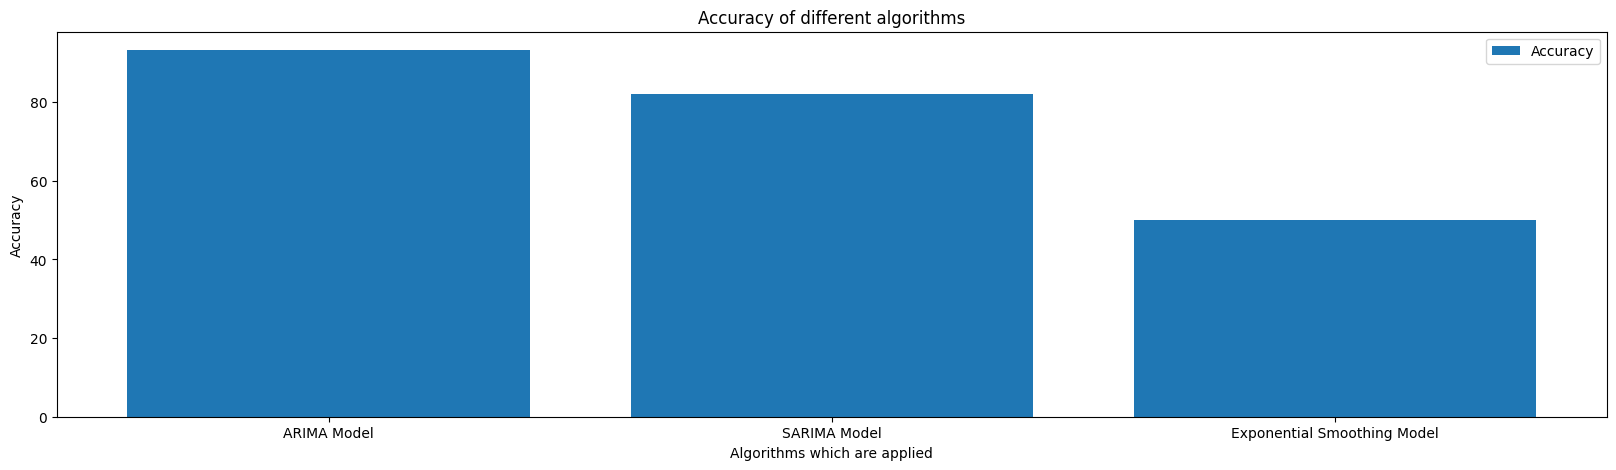

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(["ARIMA Model","SARIMA Model","Exponential Smoothing Model"],
    [93.239,82.032,49.9100],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()